# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

diamond-2.jpeg

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
DIAMONDS_DATASET = "./diamonds_good.csv"

In [3]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head(10)

shape: (10, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326.0 ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326.0 ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327.0 ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334.0 ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335.0 ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ null  ┆ Very Good ┆ J     ┆ VVS2    ┆ … ┆ 336.0 ┆ 3.94 ┆ 3.96 ┆ 2.48 │
│ 0.24  ┆ Very Good ┆ I     ┆ VVS1    ┆ … ┆ 336.0 ┆ 3.95 ┆ 3.98 ┆ 2.47 │
│ 0.26  ┆ Very Good ┆ H     ┆ SI1     ┆ … ┆ 337.0 ┆ 4.07 ┆ 4.11 ┆ 2.53 │
│ 0.22  ┆ Fair      ┆ E     ┆ VS2     ┆ … ┆ 337.0 ┆ 3.87 ┆ 3.78 ┆ 2.49 │
│ 0.23  ┆ Very Good ┆ H     ┆ VS1     ┆ … ┆ 338.0 ┆ 4.0  ┆ 4.05 ┆ 2.39 │
└───────┴───────────┴───────┴─────────┴───┴───────┴──────┴──────┴──────┘

In [5]:
df.tail()

shape: (5, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.66 ┆ 5.68 ┆ 3.56 │
│ 0.86  ┆ Premium   ┆ H     ┆ SI2     ┆ … ┆ 2757.0 ┆ 6.15 ┆ 6.12 ┆ 3.74 │
│ 0.75  ┆ Ideal     ┆ D     ┆ SI2     ┆ … ┆ 2757.0 ┆ 5.83 ┆ 5.87 ┆ 3.64 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

In [6]:
df.sample(3)

shape: (3, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.51  ┆ Premium ┆ F     ┆ VS1     ┆ … ┆ 1749.0 ┆ 5.14 ┆ 5.12 ┆ 3.19 │
│ 0.3   ┆ Premium ┆ E     ┆ VS2     ┆ … ┆ 844.0  ┆ 4.28 ┆ 4.25 ┆ 2.67 │
│ 1.01  ┆ Premium ┆ G     ┆ VVS2    ┆ … ┆ 6843.0 ┆ 6.46 ┆ 6.51 ┆ 3.98 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Исследование данных

Размер датасета

In [7]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [8]:
df.glimpse()

Rows: 53940
Columns: 10
$ carat   <f64> 0.23, 0.21, 0.23, 0.29, 0.31, null, 0.24, 0.26, 0.22, 0.23
$ cut     <str> 'Ideal', 'Premium', 'Good', 'Premium', 'Good', 'Very Good', 'Very Good', 'Very Good', 'Fair', 'Very Good'
$ color   <str> 'E', 'E', 'E', 'I', 'J', 'J', 'I', 'H', 'E', 'H'
$ clarity <str> 'SI2', 'SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'SI1', 'VS2', 'VS1'
$ depth   <f64> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4
$ table   <f64> 55.0, 61.0, 65.0, 58.0, 58.0, 57.0, 57.0, 55.0, 61.0, 61.0
$ price   <f64> 326.0, 326.0, 327.0, 334.0, 335.0, 336.0, 336.0, 337.0, 337.0, 338.0
$ 'x'     <f64> 3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 3.95, 4.07, 3.87, 4.0
$ 'y'     <f64> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05
$ 'z'     <f64> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39



Основные числовые характеристики

In [9]:
df.describe()

shape: (9, 11)
┌────────────┬──────────┬───────────┬───────┬───┬─────────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ carat    ┆ cut       ┆ color ┆ … ┆ price       ┆ 'x'      ┆ 'y'      ┆ 'z'      │
│ ---        ┆ ---      ┆ ---       ┆ ---   ┆   ┆ ---         ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ str       ┆ str   ┆   ┆ f64         ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═══════╪═══╪═════════════╪══════════╪══════════╪══════════╡
│ count      ┆ 53442.0  ┆ 53940     ┆ 53940 ┆ … ┆ 53940.0     ┆ 53940.0  ┆ 53935.0  ┆ 53940.0  │
│ null_count ┆ 498.0    ┆ 0         ┆ 0     ┆ … ┆ 0.0         ┆ 0.0      ┆ 5.0      ┆ 0.0      │
│ mean       ┆ 0.797561 ┆ null      ┆ null  ┆ … ┆ 3932.799722 ┆ 5.731157 ┆ 5.734469 ┆ 3.538734 │
│ std        ┆ 0.473534 ┆ null      ┆ null  ┆ … ┆ 3989.439738 ┆ 1.121761 ┆ 1.142125 ┆ 0.705699 │
│ min        ┆ 0.2      ┆ Fair      ┆ D     ┆ … ┆ 326.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ 25%        ┆ 0.4      ┆ null      ┆ null  ┆ … ┆ 950.0       ┆ 4.71     ┆ 4.72     ┆ 2.91     │
│ 50%        ┆ 0.7      ┆ null      ┆ null  ┆ … ┆ 2401.0      ┆ 5.7      ┆ 5.71     ┆ 3.53     │
│ 75%        ┆ 1.04     ┆ null      ┆ null  ┆ … ┆ 5324.0      ┆ 6.54     ┆ 6.54     ┆ 4.04     │
│ max        ┆ 5.01     ┆ Very Good ┆ J     ┆ … ┆ 18823.0     ┆ 10.74    ┆ 58.9     ┆ 31.8     │
└────────────┴──────────┴───────────┴───────┴───┴─────────────┴──────────┴──────────┴──────────┘

In [10]:
print(df.select(pl.col(pl.Utf8)).describe())

shape: (9, 4)
┌────────────┬───────────┬───────┬─────────┐
│ statistic  ┆ cut       ┆ color ┆ clarity │
│ ---        ┆ ---       ┆ ---   ┆ ---     │
│ str        ┆ str       ┆ str   ┆ str     │
╞════════════╪═══════════╪═══════╪═════════╡
│ count      ┆ 53940     ┆ 53940 ┆ 53940   │
│ null_count ┆ 0         ┆ 0     ┆ 0       │
│ mean       ┆ null      ┆ null  ┆ null    │
│ std        ┆ null      ┆ null  ┆ null    │
│ min        ┆ Fair      ┆ D     ┆ I1      │
│ 25%        ┆ null      ┆ null  ┆ null    │
│ 50%        ┆ null      ┆ null  ┆ null    │
│ 75%        ┆ null      ┆ null  ┆ null    │
│ max        ┆ Very Good ┆ J     ┆ VVS2    │
└────────────┴───────────┴───────┴─────────┘


In [11]:
df.is_duplicated().sum()

267

In [12]:
df.filter(df.is_duplicated())

shape: (267, 10)
┌───────┬───────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut   ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---   ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str   ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ 0.79  ┆ Ideal ┆ G     ┆ SI1     ┆ … ┆ 2898.0 ┆ 5.9  ┆ 5.85 ┆ 3.66 │
│ …     ┆ …     ┆ …     ┆ …       ┆ … ┆ …      ┆ …    ┆ …    ┆ …    │
│ 0.71  ┆ Good  ┆ F     ┆ SI2     ┆ … ┆ 2130.0 ┆ 0.0  ┆ 0.0  ┆ 0.0  │
│ 0.51  ┆ Ideal ┆ F     ┆ VVS2    ┆ … ┆ 2203.0 ┆ 5.19 ┆ 5.17 ┆ 3.17 │
│ 0.51  ┆ Ideal ┆ F     ┆ VVS2    ┆ … ┆ 2203.0 ┆ 5.19 ┆ 5.17 ┆ 3.17 │
│ 0.5   ┆ Fair  ┆ E     ┆ VS2     ┆ … ┆ 2579.0 ┆ 5.21 ┆ 5.18 ┆ 4.09 │
│ 0.5   ┆ Fair  ┆ E     ┆ VS2     ┆ … ┆ 2579.0 ┆ 5.21 ┆ 5.18 ┆ 4.09 │
└───────┴───────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

In [13]:
df = df.unique()
print(df.shape)


(53805, 10)


In [14]:
df.head()

shape: (5, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 1.01  ┆ Good      ┆ G     ┆ SI2     ┆ … ┆ 3626.0 ┆ 6.31 ┆ 6.35 ┆ 4.03 │
│ 0.52  ┆ Ideal     ┆ E     ┆ SI1     ┆ … ┆ 1330.0 ┆ 5.15 ┆ 5.18 ┆ 3.17 │
│ 0.74  ┆ Very Good ┆ H     ┆ VVS2    ┆ … ┆ 2921.0 ┆ 5.79 ┆ 5.81 ┆ 3.51 │
│ 0.55  ┆ Ideal     ┆ F     ┆ VS2     ┆ … ┆ 1692.0 ┆ 5.27 ┆ 5.3  ┆ 3.23 │
│ 0.51  ┆ Ideal     ┆ F     ┆ VS1     ┆ … ┆ 1744.0 ┆ 5.14 ┆ 5.17 ┆ 3.18 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [15]:
df.select(["carat", "depth", "table", "price", "'x'", "'y'", "'z'"]).to_pandas().hist(bins=100, figsize=(10, 10))
plt.show()


In [16]:
median_carat = df["carat"].median()
df = df.with_columns(
    pl.col("carat").fill_null(median_carat)
)


In [17]:
median_depth = df['depth'].median()

df = df.with_columns(
    pl.col('carat').fill_null(median_depth)
)

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [18]:
median_y = df["'y'"].median()
print("median_y = ", median_y)


median_y =  5.71


In [19]:
df = df.with_columns(
    pl.col("'y'").fill_null(median_y)
)

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

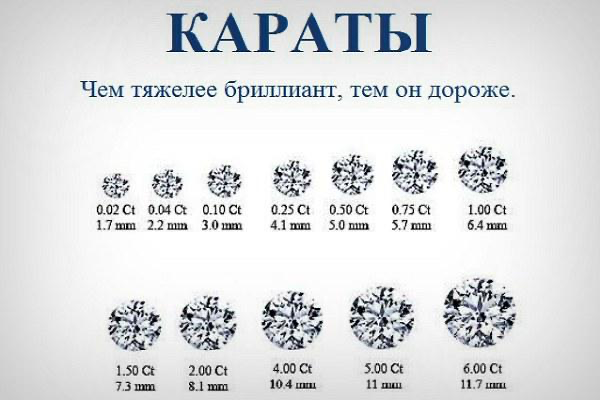

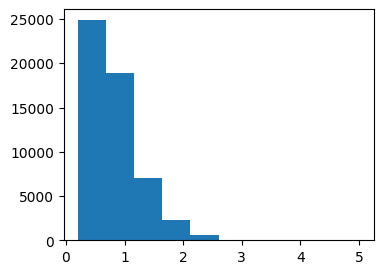

In [20]:
plt.figure(figsize=(4,3))
plt.hist(df["carat"])
plt.show()


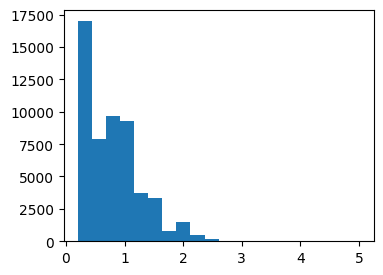

In [21]:
plt.figure(figsize=(4,3))

plt.hist(df['carat'], bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [22]:
df['carat'].min(), df['carat'].max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [23]:
count = df.filter(pl.col("carat") < 0.3).height
print(count)

1582


Сколько процентов бриллиантов среди всего датасета - крупные?

In [24]:
percentage = df.select(
    (pl.col("carat") >= 1).mean() * 100
).item()
print(percentage)


35.00046464083263


Посмотрим как число карат влияет на стоимость алмаза

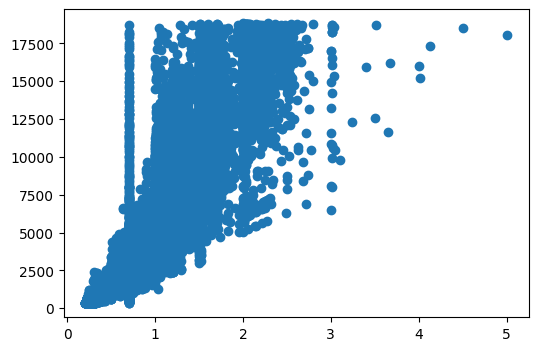

In [25]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'], df['price']);

In [26]:
np.corrcoef(df['carat'], df['price'])[0][1]

np.float64(0.9164989435440218)

### Cut (огранка алмаза)

image.png

In [27]:
df['cut'].value_counts(normalize=True)

shape: (6, 2)
┌───────────┬────────────┐
│ cut       ┆ proportion │
│ ---       ┆ ---        │
│ str       ┆ f64        │
╞═══════════╪════════════╡
│ Premium   ┆ 0.255088   │
│ Very Good ┆ 0.224013   │
│ Fair      ┆ 0.0297     │
│ Good      ┆ 0.090772   │
│ Ideal     ┆ 0.398941   │
│ Goood     ┆ 0.001487   │
└───────────┴────────────┘

In [28]:
df = df.with_columns(
    pl.when(pl.col("cut") == "Goood")
      .then(pl.lit("Good"))
      .otherwise(pl.col("cut"))
      .alias("cut")
)


Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipykernel_6173/1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


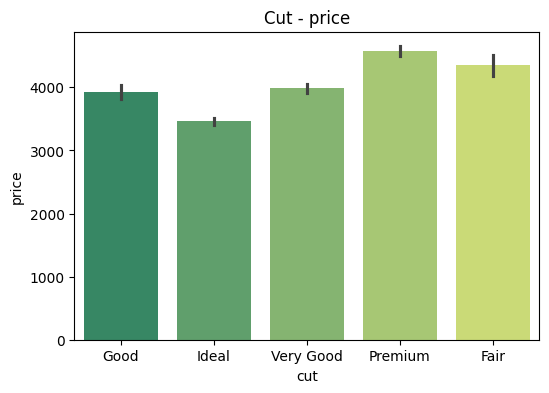

In [29]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [30]:
max_carat_fair = df.filter(pl.col("cut") == "Fair").select(pl.col("carat").max()).item()
print('max carat fair = ', max_carat_fair)


max carat fair =  5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [31]:
df.group_by("cut").agg(pl.col("price").mean())

shape: (5, 2)
┌───────────┬─────────────┐
│ cut       ┆ price       │
│ ---       ┆ ---         │
│ str       ┆ f64         │
╞═══════════╪═════════════╡
│ Good      ┆ 3926.266317 │
│ Ideal     ┆ 3462.59385  │
│ Very Good ┆ 3982.162781 │
│ Premium   ┆ 4581.864918 │
│ Fair      ┆ 4347.735294 │
└───────────┴─────────────┘

Посчитаем несколько характеристик в зависимости от огранки

In [32]:
df.group_by("cut").agg(
    PriceMean = pl.col("price").mean(),
    PriceMedian = pl.col("price").median(),
    CaratMean = pl.col("carat").mean()
)


shape: (5, 4)
┌───────────┬─────────────┬─────────────┬───────────┐
│ cut       ┆ PriceMean   ┆ PriceMedian ┆ CaratMean │
│ ---       ┆ ---         ┆ ---         ┆ ---       │
│ str       ┆ f64         ┆ f64         ┆ f64       │
╞═══════════╪═════════════╪═════════════╪═══════════╡
│ Good      ┆ 3926.266317 ┆ 3029.5      ┆ 0.845796  │
│ Fair      ┆ 4347.735294 ┆ 3282.0      ┆ 1.040094  │
│ Very Good ┆ 3982.162781 ┆ 2649.0      ┆ 0.804177  │
│ Ideal     ┆ 3462.59385  ┆ 1813.0      ┆ 0.703331  │
│ Premium   ┆ 4581.864918 ┆ 3175.0      ┆ 0.889616  │
└───────────┴─────────────┴─────────────┴───────────┘

In [33]:
df.group_by("cut").agg(
    PriceMean = pl.col("price").mean(),
    PriceMedian = pl.col("price").median(),
    CaratMean = pl.col("carat").mean()
).sort("PriceMean", descending=True)


shape: (5, 4)
┌───────────┬─────────────┬─────────────┬───────────┐
│ cut       ┆ PriceMean   ┆ PriceMedian ┆ CaratMean │
│ ---       ┆ ---         ┆ ---         ┆ ---       │
│ str       ┆ f64         ┆ f64         ┆ f64       │
╞═══════════╪═════════════╪═════════════╪═══════════╡
│ Premium   ┆ 4581.864918 ┆ 3175.0      ┆ 0.889616  │
│ Fair      ┆ 4347.735294 ┆ 3282.0      ┆ 1.040094  │
│ Very Good ┆ 3982.162781 ┆ 2649.0      ┆ 0.804177  │
│ Good      ┆ 3926.266317 ┆ 3029.5      ┆ 0.845796  │
│ Ideal     ┆ 3462.59385  ┆ 1813.0      ┆ 0.703331  │
└───────────┴─────────────┴─────────────┴───────────┘

## Table and Depth

image.png

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [34]:
percentage = df.select(
    ((pl.col("table") >= 55) & (pl.col("table") <= 60)).mean()
).item()
print(percentage)


0.8439364371340954


### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [35]:
share = df.select(
    (
        pl.col("table").is_between(55, 60) & 
        pl.col("depth").is_between(59, 62.5)
    ).mean()
).item()

print(share)


0.6146279759095286


### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [36]:
medians = df.select(
    median_optimal_table = pl.col("price")
        .filter(pl.col("table").is_between(55, 60))
        .median(),
    median_optimal_depth = pl.col("price")
        .filter(pl.col("depth").is_between(59, 62.5))
        .median()
).to_dict(as_series=False)

med_table = medians["median_optimal_table"][0]
med_depth = medians["median_optimal_depth"][0]

res = 'С оптимальным table' if med_table > med_depth else 'С оптимальным depth'
print(res)


С оптимальным table


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [37]:
np.corrcoef(df['table'], df['price'])[0][1]

np.float64(0.12662153885758198)

In [38]:
np.corrcoef(df['depth'], df['price'])[0][1]

np.float64(nan)

## Clarity - прозрачность алмаза

image.png

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [39]:
len(df['clarity'].unique())

8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [40]:
((df['clarity'] == 'VVS1') | (df['clarity'] == 'VVS2')).sum()

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

In [41]:
# Группируем и агрегируем данные
agg_df = df.group_by("clarity").agg(pl.col("price").mean())

# В Polars нет метода .plot(), поэтому используем plt.bar напрямую
plt.figure(figsize=(10, 6))
plt.bar(agg_df["clarity"], agg_df["price"])

plt.title('Средняя цена по clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()


Самые дорогие - SI2

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [42]:
res = df.group_by(["cut", "clarity"]).agg(
    mean_price = pl.col("price").mean(),
    median_price = pl.col("price").median()
)

res_sorted = res.sort(["cut", "mean_price"], descending=[False, True])

print(res_sorted)

top_diamond = res.sort("mean_price", descending=True).row(0)

print(f"Алмазы с наибольшей средней ценой имеют огранку и чистоту: {top_diamond[0]}, {top_diamond[1]}")


shape: (40, 4)
┌───────────┬─────────┬─────────────┬──────────────┐
│ cut       ┆ clarity ┆ mean_price  ┆ median_price │
│ ---       ┆ ---     ┆ ---         ┆ ---          │
│ str       ┆ str     ┆ f64         ┆ f64          │
╞═══════════╪═════════╪═════════════╪══════════════╡
│ Fair      ┆ SI2     ┆ 5145.740175 ┆ 3681.0       │
│ Fair      ┆ SI1     ┆ 4201.818182 ┆ 3511.0       │
│ Fair      ┆ VS2     ┆ 4189.217054 ┆ 3202.5       │
│ Fair      ┆ VS1     ┆ 4165.141176 ┆ 2829.5       │
│ Fair      ┆ VVS1    ┆ 3871.352941 ┆ 2797.0       │
│ …         ┆ …       ┆ …           ┆ …            │
│ Very Good ┆ I1      ┆ 4078.22619  ┆ 3283.0       │
│ Very Good ┆ SI1     ┆ 3936.972136 ┆ 2810.0       │
│ Very Good ┆ VS1     ┆ 3805.480813 ┆ 2326.5       │
│ Very Good ┆ VVS2    ┆ 3037.394652 ┆ 1032.0       │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0        │
└───────────┴─────────┴─────────────┴──────────────┘
Алмазы с наибольшей средней ценой имеют огранку и чистоту: Premium, SI2


## Pandas profiling

In [43]:
from ydata_profiling import ProfileReport

In [44]:
df_copy = pl.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy.to_pandas(), title='Pandas Profiling Report')

In [45]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 40.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

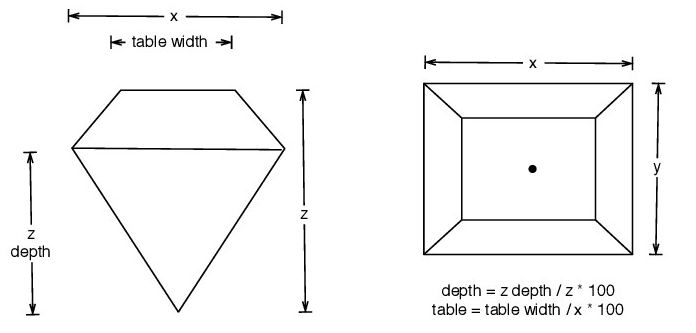

In [47]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [48]:
df = df.rename({"'x'": "x", "'y'": "y", "'z'": "z"})
print(df.columns)


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [49]:
xyz_median = df.select(
    pl.col(["x", "y", "z"]).median()
)
print(xyz_median)

xyz_transposed = xyz_median.transpose(include_header=True)
max_row = xyz_transposed.sort("column_0", descending=True).row(0)

print('Максимальное значение: ', max_row[0], "=", max_row[1])


shape: (1, 3)
┌─────┬──────┬──────┐
│ x   ┆ y    ┆ z    │
│ --- ┆ ---  ┆ ---  │
│ f64 ┆ f64  ┆ f64  │
╞═════╪══════╪══════╡
│ 5.7 ┆ 5.71 ┆ 3.53 │
└─────┴──────┴──────┘
Максимальное значение:  y = 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [50]:
print(
    df["x"].min(), 
    df["y"].min(), 
    df["z"].min()
)

0.0 0.0 0.0


Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [51]:
xyz_zero = df.filter(
    (pl.col("x") == 0) | (pl.col("y") == 0) | (pl.col("z") == 0)
)

print(xyz_zero)
print('Количество строк: ', xyz_zero.height)

shape: (19, 10)
┌───────┬─────────┬───────┬─────────┬───┬─────────┬──────┬──────┬─────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price   ┆ x    ┆ y    ┆ z   │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---     ┆ ---  ┆ ---  ┆ --- │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64     ┆ f64  ┆ f64  ┆ f64 │
╞═══════╪═════════╪═══════╪═════════╪═══╪═════════╪══════╪══════╪═════╡
│ 2.02  ┆ Premium ┆ H     ┆ VS2     ┆ … ┆ 18207.0 ┆ 8.02 ┆ 7.95 ┆ 0.0 │
│ 2.8   ┆ Good    ┆ G     ┆ SI2     ┆ … ┆ 18788.0 ┆ 8.9  ┆ 8.85 ┆ 0.0 │
│ 1.01  ┆ Premium ┆ H     ┆ I1      ┆ … ┆ 3167.0  ┆ 6.66 ┆ 6.6  ┆ 0.0 │
│ 1.07  ┆ Ideal   ┆ F     ┆ SI2     ┆ … ┆ 4954.0  ┆ 0.0  ┆ 6.62 ┆ 0.0 │
│ 0.71  ┆ Good    ┆ F     ┆ SI2     ┆ … ┆ 2130.0  ┆ 0.0  ┆ 0.0  ┆ 0.0 │
│ …     ┆ …       ┆ …     ┆ …       ┆ … ┆ …       ┆ …    ┆ …    ┆ …   │
│ 1.5   ┆ Good    ┆ G     ┆ I1      ┆ … ┆ 4731.0  ┆ 7.15 ┆ 7.04 ┆ 0.0 │
│ 1.56  ┆ Ideal   ┆ G     ┆ VS2     ┆ … ┆ 12800.0 ┆ 0.0  ┆ 0.0  ┆ 0.0 │
│ 1.0   ┆ Premium ┆ G     ┆ SI2     ┆ … ┆ 3142.0

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [52]:
df = df.filter(
    (pl.col("x") != 0) & (pl.col("y") != 0) & (pl.col("z") != 0)
)
print('Осталось: ', df.height)

Осталось:  53786


### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [53]:
import polars.selectors as cs

correlation = df.select(
    pl.corr(pl.col(col_name), pl.col("price"))
    for col_name in df.select(cs.numeric()).columns if col_name != "price"
)

print(correlation.transpose(include_header=True))


shape: (6, 2)
┌────────┬───────────┐
│ column ┆ column_0  │
│ ---    ┆ ---       │
│ str    ┆ f64       │
╞════════╪═══════════╡
│ carat  ┆ 0.916492  │
│ depth  ┆ -0.011041 │
│ table  ┆ 0.126722  │
│ x      ┆ 0.887183  │
│ y      ┆ 0.867665  │
│ z      ┆ 0.868089  │
└────────┴───────────┘


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

Text(0, 0.5, 'Price')

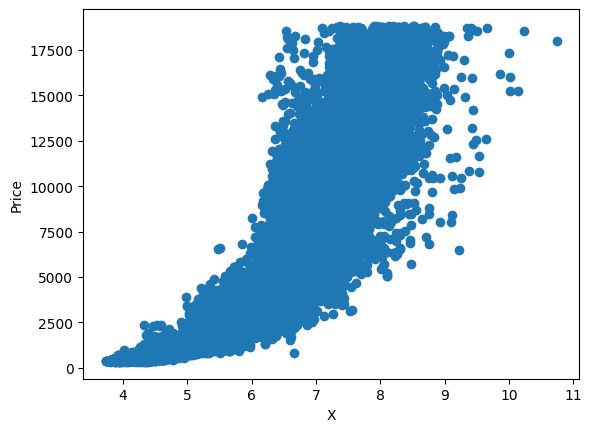

In [54]:
plt.scatter(df['x'], df['price'])
plt.xlabel('X')
plt.ylabel('Price')

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [55]:
percent = df.select(
    ((pl.col("x") > pl.col("x").mean()) & 
     (pl.col("y") > pl.col("y").mean())).mean() * 100
).item()

print('percent: ', percent)

percent:  47.3784999814078


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [56]:
result = df.select(
    ((pl.col("carat") > 1.0) & (pl.col("z") < pl.col("z").median())).sum() / 
    (pl.col("carat") > 1.0).sum()
).item()

print(round(result, 4))

0.0002


## 2) Color

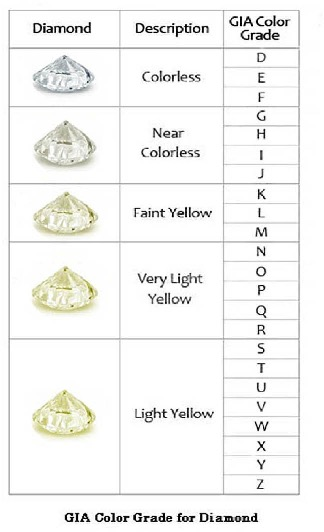

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [57]:
df['color'].unique()

shape: (7,)
Series: 'color' [str]
[
	"I"
	"H"
	"D"
	"G"
	"F"
	"E"
	"J"
]

Colorless, Near Colorless

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

In [58]:
agg_data = df.group_by("color").agg(pl.col("price").mean()).sort("price")

plt.figure()
plt.bar(agg_data["color"], agg_data["price"])

plt.xticks(rotation=90)
plt.xlabel("color")
plt.tight_layout()
plt.show()

Дороже алмазы цвета J (Почти безцветные)

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [59]:
df.group_by("color").agg(
    pl.col("price").median(),
    pl.col("carat").median()
).sort("price", descending=True)

shape: (7, 3)
┌───────┬────────┬───────┐
│ color ┆ price  ┆ carat │
│ ---   ┆ ---    ┆ ---   │
│ str   ┆ f64    ┆ f64   │
╞═══════╪════════╪═══════╡
│ J     ┆ 4234.5 ┆ 1.11  │
│ I     ┆ 3721.5 ┆ 1.0   │
│ H     ┆ 3449.5 ┆ 0.9   │
│ F     ┆ 2345.0 ┆ 0.7   │
│ G     ┆ 2242.0 ┆ 0.7   │
│ D     ┆ 1842.0 ┆ 0.54  │
│ E     ┆ 1741.0 ┆ 0.54  │
└───────┴────────┴───────┘

Да, Медианные кратаы умешьшаются вместе со стоимостью

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [60]:
grouped = df.group_by(["cut", "color", "clarity"]).agg(
    pl.col("price").mean()
).sort("price", descending=True)

print(grouped)

top_row = grouped.row(0)

print('\nСамые дорогие: ', end='')
print(*top_row[:3], sep=',')

shape: (276, 4)
┌───────────┬───────┬─────────┬──────────────┐
│ cut       ┆ color ┆ clarity ┆ price        │
│ ---       ┆ ---   ┆ ---     ┆ ---          │
│ str       ┆ str   ┆ str     ┆ f64          │
╞═══════════╪═══════╪═════════╪══════════════╡
│ Very Good ┆ D     ┆ IF      ┆ 10298.26087  │
│ Good      ┆ D     ┆ IF      ┆ 10030.333333 │
│ Ideal     ┆ J     ┆ I1      ┆ 9454.0       │
│ Premium   ┆ D     ┆ IF      ┆ 9056.5       │
│ Premium   ┆ J     ┆ SI2     ┆ 7550.285714  │
│ …         ┆ …     ┆ …       ┆ …            │
│ Good      ┆ E     ┆ IF      ┆ 1519.222222  │
│ Ideal     ┆ I     ┆ IF      ┆ 1509.404255  │
│ Fair      ┆ G     ┆ IF      ┆ 1488.0       │
│ Premium   ┆ H     ┆ VVS1    ┆ 1453.758929  │
│ Very Good ┆ J     ┆ IF      ┆ 1074.125     │
└───────────┴───────┴─────────┴──────────────┘

Самые дорогие: Very Good,D,IF


# Практика 
### One-hot encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder
cut_map = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_encoded = df.with_columns(
    cut_encoded = pl.col("cut").replace(cut_map, default=None),
    clarity_encoded = pl.col("clarity").replace(clarity_map, default=None)
).to_dummies("color")


/tmp/ipykernel_6173/559560740.py:6: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  cut_encoded = pl.col("cut").replace(cut_map, default=None),
/tmp/ipykernel_6173/559560740.py:7: DeprecationWarning: the `default` parameter for `replace` is deprecated. Use `replace_strict` instead to set a default while replacing values.
(Deprecated in version 1.0.0)
  clarity_encoded = pl.col("clarity").replace(clarity_map, default=None)


In [62]:
df_encoded = df_encoded.drop(["cut", "clarity"])
df_encoded = df_encoded.with_columns(
    pl.col("depth").fill_nan(None)
)
df_encoded = df_encoded.with_columns(
    pl.col("depth").fill_nan(None).fill_null(pl.col("depth").median())
)


### Матрица корреляций, хитмап

In [63]:
corr = df_encoded.corr()
corr

shape: (16, 16)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ carat     ┆ color_D   ┆ color_E   ┆ color_F   ┆ … ┆ y         ┆ z         ┆ cut_encod ┆ clarity_ │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ed        ┆ encoded  │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ -0.110872 ┆ -0.138693 ┆ -0.059177 ┆ … ┆ 0.94887   ┆ 0.955969  ┆ -0.132324 ┆ 0.340676 │
│ -0.110872 ┆ 1.0       ┆ -0.178629 ┆ -0.175731 ┆ … ┆ -0.103667 ┆ -0.10576  ┆ 0.007679  ┆ 0.076906 │
│ -0.138693 ┆ -0.178629 ┆ 1.0       ┆ -0.218555 ┆ … ┆ -0.13064  ┆ -0.133819 ┆ -0.003926 ┆ 0.020277 │
│ -0.059177 ┆ -0.175731 ┆ -0.218555 ┆ 1.0       ┆ … ┆ -0.046498 ┆ -0.048874 ┆ -0.007303 ┆ -0.02256 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 8        │
│ -0.029116 ┆ -0.194969 ┆ -0.24248  ┆ -0.238546 ┆ … ┆ -0.024382 ┆ -0.023599 ┆ 0.039937  ┆ -0.13009 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 0.972709  ┆ -0.105822 ┆ -0.134817 ┆ -0.047602 ┆ … ┆ 0.974774  ┆ 0.975395  ┆ -0.124843 ┆ 0.361829 │
│ 0.94887   ┆ -0.103667 ┆ -0.13064  ┆ -0.046498 ┆ … ┆ 1.0       ┆ 0.956581  ┆ -0.120769 ┆ 0.348146 │
│ 0.955969  ┆ -0.10576  ┆ -0.133819 ┆ -0.048874 ┆ … ┆ 0.956581  ┆ 1.0       ┆ -0.149079 ┆ 0.3593   │
│ -0.132324 ┆ 0.007679  ┆ -0.003926 ┆ -0.007303 ┆ … ┆ -0.120769 ┆ -0.149079 ┆ 1.0       ┆ -0.18219 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 4        │
│ 0.340676  ┆ 0.076906  ┆ 0.020277  ┆ -0.022568 ┆ … ┆ 0.348146  ┆ 0.3593    ┆ -0.182194 ┆ 1.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

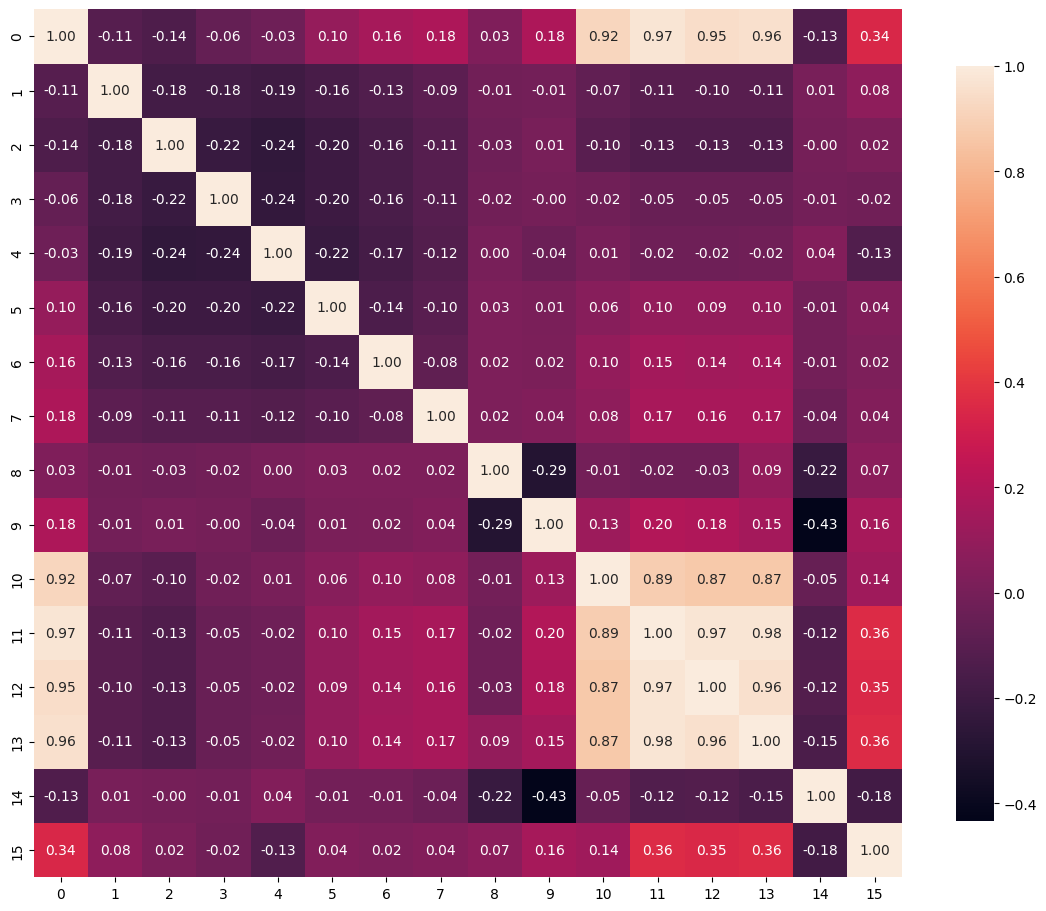

In [64]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.show()

### Feature Importance (Linear Regression, GradientBoosting, RandomForest

In [65]:
features = df_encoded.drop(["price"])

target = df_encoded["price"]

In [66]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest.fit(features, target)

features_importances = pl.DataFrame({
    'feature': features.columns,
    'importance': random_forest.feature_importances_
}).sort("importance", descending=True)

features_importances


shape: (15, 2)
┌─────────────────┬────────────┐
│ feature         ┆ importance │
│ ---             ┆ ---        │
│ str             ┆ f64        │
╞═════════════════╪════════════╡
│ y               ┆ 0.865163   │
│ clarity_encoded ┆ 0.062434   │
│ carat           ┆ 0.015407   │
│ color_J         ┆ 0.010981   │
│ x               ┆ 0.010512   │
│ …               ┆ …          │
│ color_G         ┆ 0.002463   │
│ table           ┆ 0.002332   │
│ color_E         ┆ 0.001785   │
│ color_F         ┆ 0.001602   │
│ cut_encoded     ┆ 0.001572   │
└─────────────────┴────────────┘

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

target_scaled = StandardScaler().fit_transform(target.to_frame()).ravel()

linear_reg = LinearRegression()
linear_reg.fit(features_scaled, target_scaled)

feat_importances = pl.DataFrame({
    'feature': features.columns,
    'importance': linear_reg.coef_
}).sort("importance", descending=True)

print(feat_importances)


shape: (15, 2)
┌─────────────────┬────────────┐
│ feature         ┆ importance │
│ ---             ┆ ---        │
│ str             ┆ f64        │
╞═════════════════╪════════════╡
│ carat           ┆ 1.049813   │
│ color_D         ┆ 0.051539   │
│ color_E         ┆ 0.03961    │
│ cut_encoded     ┆ 0.033875   │
│ color_F         ┆ 0.028649   │
│ …               ┆ …          │
│ x               ┆ -0.030542  │
│ color_H         ┆ -0.030874  │
│ color_I         ┆ -0.05522   │
│ color_J         ┆ -0.089028  │
│ clarity_encoded ┆ -0.201354  │
└─────────────────┴────────────┘


In [68]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state=42)
grad_boost.fit(features, target)

feat_importances = pl.DataFrame({
    'feature': features.columns,
    'importance': grad_boost.feature_importances_
}).sort("importance", descending=True)

feat_importances

shape: (15, 2)
┌─────────────────┬────────────┐
│ feature         ┆ importance │
│ ---             ┆ ---        │
│ str             ┆ f64        │
╞═════════════════╪════════════╡
│ y               ┆ 0.800104   │
│ z               ┆ 0.097294   │
│ clarity_encoded ┆ 0.060202   │
│ x               ┆ 0.011101   │
│ color_J         ┆ 0.00916    │
│ …               ┆ …          │
│ color_E         ┆ 0.001258   │
│ color_G         ┆ 0.000665   │
│ cut_encoded     ┆ 0.000368   │
│ depth           ┆ 0.000246   │
│ table           ┆ 0.000031   │
└─────────────────┴────────────┘

### Permutation importance

In [72]:
from sklearn.inspection import permutation_importance
import polars as pl

X = features
y = target

models = {
    'GradientBoosting': (grad_boost, X),
    'LinearRegression': (linear_reg, features_scaled),
    'RandomForest': (random_forest, X),
}

perm_results = {}

for name, (model, X_used) in models.items():
    # Примечание: для LinearRegression, обученной на target_scaled, 
    # score с обычным y может быть некорректным, но оставляем логику как в оригинале.
    r = permutation_importance(
        model,
        X_used,
        y,
        n_repeats=10,
        random_state=42,
        n_jobs=-1,
    )

    perm_df = (
        pl.DataFrame({
            'feature': features.columns,
            'importance_mean': r.importances_mean,
            'importance_std': r.importances_std,
        })
        .sort('importance_mean', descending=True)
    )

    perm_results[name] = perm_df

# Вывод результатов (head в Polars выводит первые 5 строк по умолчанию)
print(perm_results['GradientBoosting'].head())
print(perm_results['LinearRegression'].head())
print(perm_results['RandomForest'].head())


/home/bowie/repos/EDA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/bowie/repos/EDA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/bowie/repos/EDA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/bowie/repos/EDA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/bowie/repos/EDA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid fe

shape: (5, 3)
┌─────────────────┬─────────────────┬────────────────┐
│ feature         ┆ importance_mean ┆ importance_std │
│ ---             ┆ ---             ┆ ---            │
│ str             ┆ f64             ┆ f64            │
╞═════════════════╪═════════════════╪════════════════╡
│ y               ┆ 0.958635        ┆ 0.005408       │
│ clarity_encoded ┆ 0.133702        ┆ 0.000997       │
│ z               ┆ 0.126276        ┆ 0.000732       │
│ x               ┆ 0.026426        ┆ 0.000224       │
│ color_J         ┆ 0.021397        ┆ 0.000268       │
└─────────────────┴─────────────────┴────────────────┘
shape: (5, 3)
┌─────────┬─────────────────┬────────────────┐
│ feature ┆ importance_mean ┆ importance_std │
│ ---     ┆ ---             ┆ ---            │
│ str     ┆ f64             ┆ f64            │
╞═════════╪═════════════════╪════════════════╡
│ carat   ┆ 0.000483        ┆ 0.000003       │
│ y       ┆ 0.00001         ┆ 5.9993e-8      │
│ depth   ┆ 1.0460e-7       ┆ 2.7703e-

### Обучение моделей

In [73]:
from sklearn.model_selection import train_test_split

features = df_encoded.drop("price")
target = df_encoded["price"]

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2
)

target_train_binned = target_train.qcut(5, labels=None).to_physical()


In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(features_train, target_train)

linear_reg = LinearRegression()
linear_reg.fit(features_train, target_train)

grad_boost = GradientBoostingRegressor()
grad_boost.fit(features_train, target_train)


GradientBoostingRegressor()

### Сравнение моделей

In [76]:
import polars as pl
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'RandomForest': random_forest,
    'LinearRegression': linear_reg,
    'GradientBoosting': grad_boost,
}

results = []

for name, model in models.items():
    # .predict возвращает numpy array, это ок
    y_pred = model.predict(features_test)

    # Метрики принимают (Polars Series, Numpy Array) без проблем
    results.append({
        'model': name,
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred)),
        'MAE': mean_absolute_error(target_test, y_pred),
        'R2': r2_score(target_test, y_pred),
    })

# Создаем DataFrame и сортируем
# .sort_values('RMSE') заменяется на .sort('RMSE')
metrics_df = pl.DataFrame(results).sort('RMSE')
print(metrics_df)


shape: (3, 4)
┌──────────────────┬─────────────┬────────────┬──────────┐
│ model            ┆ RMSE        ┆ MAE        ┆ R2       │
│ ---              ┆ ---         ┆ ---        ┆ ---      │
│ str              ┆ f64         ┆ f64        ┆ f64      │
╞══════════════════╪═════════════╪════════════╪══════════╡
│ RandomForest     ┆ 554.624166  ┆ 274.966474 ┆ 0.981019 │
│ GradientBoosting ┆ 678.653817  ┆ 376.241532 ┆ 0.97158  │
│ LinearRegression ┆ 1325.426591 ┆ 860.087533 ┆ 0.891596 │
└──────────────────┴─────────────┴────────────┴──────────┘
